# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Dr. Ing. Rodriguez, Juan Manuel </center>

## <center>Métodos de Regresión</center>
### <center> Práctica Regresión Lineal </center>


En esta notebook vamos a analizar la correlación entre las variables en un conjunto de datos y vamos realizar modelos de regresión lineal simples y múltiples.

Links:

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://seaborn.pydata.org/tutorial/color_palettes.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html


## Machete

* La **población** es el conjunto completo de elementos con características
en común y que se quiere estudiar.

* Una **muestra** es un subconjunto representativo de la población, cuyo menor tamaño la hace más fácil de manejar.

* A las poblaciones por lo general se las estudia a través de una muestra cuidadosamente seleccionada. Por extensión, las características de la muestra corresponden a las de población dentro un estrecho margen, que el investigador establece usando técnicas estadísticas.

* $\mu$ es la **media** poblacional, es una medida de tendencia central. Es la media aritmética de todos los elementos de la población.

* $\sigma$ es la **desviación estándar** poblacional, es un índice numérico de la dispersión de un conjunto de datos. Mide la variabilidad absoluta de la distribución de un conjunto de datos.

* $\bar{X}$ es la media muestral (promedio) de la variable aleatoria $𝐗$

## Librerias

In [1]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

## Covarianza y Correlación

Tanto la covarianza como la correlación son medidas de **asociación lineal** entre dos variables.  <br>
La Covarianza indica la dirección/sentido de esa asociación lineal y la Correlación mide tanto la fuerza como el sentido de dicha asociación lineal.

*Covarianza (poblacional):*

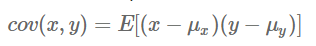

Signo de la Covarianza

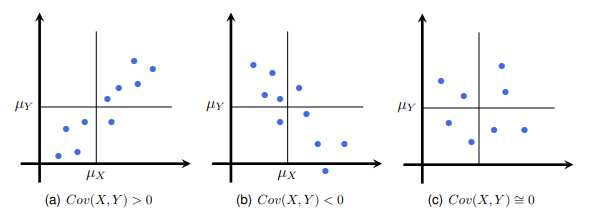

El valor (magnitud) de la covarianza depende las unidades en que se miden las variables.  <br>Si las escalas de medida de las variables fueran muy diferentes, la variabilidad estaría dominada por las variables con mayores magnitudes.

La Correlación se define como la covarianza de los datos estandarizados, por lo que evita el problema de las diferencias en las escalas de medición. Se obtiene dividiendo la covarianza de dos variables por el producto de sus desvíos estándar.

*Correlación (poblacional):*

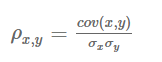

Los valores del coeficiente de correlación van de -1 a 1. Cuanto más cerca esté de 1 (o -1), más estrechamente relacionadas estarán las dos variables. El signo positivo significa la dirección de la correlación, es decir, si una de las variables aumenta, se supone que la otra también aumentará.

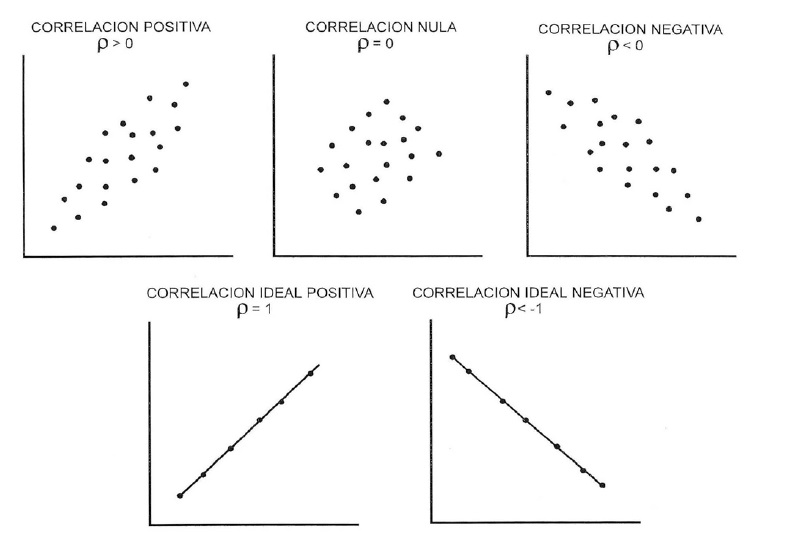

¿Cómo estimar el coeficiente de correlación poblacional desconocido? Con un estimador muestral.

Coeficiente de Correlación de Pearson:

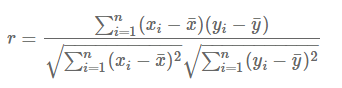


Armemos un ejemplo con datos simulados:

In [ ]:
#x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [ ]:
type(y)

numpy.ndarray

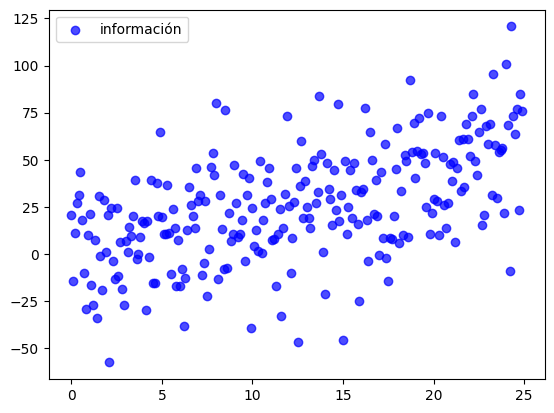

In [25]:
#Valores de X
x = np.arange(0, 25, 0.1)  # vector de numeros de 0 a 25 con intervalos de 0.1

#ruido gausiano
ruido = np.random.randn(x.shape[0])

# y = a x + b + c*ruido gausiano
a = 2
b = 1
c = 25

y = a*x + b + c*ruido

#scatter plot


plt.scatter(x, y, label='información', color='blue', alpha=.7)
plt.legend();

In [22]:
covariance = np.cov(x, y)[0][1]
print(f"Covarianza: cov={covariance}")

Covarianza: cov=100.05027213338853


In [23]:
corr_pearson = np.corrcoef(x, y)[0][1]
print(f"Correlación Pearson: r={corr_pearson}")

Correlación Pearson: r=0.4823779045618515


### Ejemplo Spotify

In [ ]:
#Cargo el Dataset
dataset = pd.read_csv('spotify.csv')
dataset.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99.0,0.0421,0.726,190440.0,0.554,0.1060,-5.290,0.0917,169.999,0.335
1,Dance,83.0,0.1090,0.775,208787.0,0.613,0.1340,-4.586,0.0542,100.066,0.797
2,Dance,87.0,0.0441,0.737,222653.0,0.636,0.3500,-4.546,0.0437,105.005,0.565
3,Dance,78.0,0.0203,0.586,220573.0,0.701,0.0550,-5.326,0.0416,104.957,0.254
4,Dance,72.0,0.4220,0.728,200773.0,0.646,0.0899,-4.387,0.0463,103.983,0.460


In [ ]:
#Calculo la Covarianza
matriz_cov=dataset.cov(numeric_only=True)
matriz_cov

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
popularity,282.853605,-2.278777,1.113467,-2.748691e+05,1.500922,-0.458652,45.085785,0.246491,76.015061,0.869325
acousticness,-2.278777,0.124442,-0.034638,4.400058e+03,-0.070471,-0.003287,-1.514237,-0.007158,-2.667562,-0.030921
danceability,1.113467,-0.034638,0.037145,-5.131672e+03,0.023672,-0.002733,0.638449,0.004307,0.532795,0.029761
duration_ms,-274869.100855,4400.058370,-5131.672483,1.294476e+10,-4032.635405,693.367018,-144846.129805,-1209.888552,-121047.096363,-5812.423151
energy,1.500922,-0.070471,0.023672,-4.032635e+03,0.065474,0.004418,1.308216,0.005035,1.976439,0.033041
liveness,-0.458652,-0.003287,-0.002733,6.933670e+02,0.004418,0.032045,0.051787,0.000896,0.220681,-0.001129
loudness,45.085785,-1.514237,0.638449,-1.448461e+05,1.308216,0.051787,37.479352,0.104860,42.275989,0.701981
speechiness,0.246491,-0.007158,0.004307,-1.209889e+03,0.005035,0.000896,0.104860,0.008667,0.423209,0.002602
tempo,76.015061,-2.667562,0.532795,-1.210471e+05,1.976439,0.220681,42.275989,0.423209,902.946901,1.196141
valence,0.869325,-0.030921,0.029761,-5.812423e+03,0.033041,-0.001129,0.701981,0.002602,1.196141,0.069447


In [ ]:
#Calculo la correlación
matriz_corr=dataset.corr(numeric_only=True)
matriz_corr

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.384093,0.343517,-0.143647,0.348773,-0.152342,0.437888,0.157425,0.150414,0.196144
acousticness,-0.384093,1.000000,-0.509468,0.109629,-0.780717,-0.052053,-0.701154,-0.217959,-0.251651,-0.332614
danceability,0.343517,-0.509468,1.000000,-0.234025,0.480013,-0.079208,0.541105,0.240040,0.091998,0.585970
duration_ms,-0.143647,0.109629,-0.234025,1.000000,-0.138519,0.034043,-0.207952,-0.114223,-0.035406,-0.193858
energy,0.348773,-0.780717,0.480013,-0.138519,1.000000,0.096443,0.835121,0.211376,0.257050,0.489998
liveness,-0.152342,-0.052053,-0.079208,0.034043,0.096443,1.000000,0.047255,0.053733,0.041025,-0.023927
loudness,0.437888,-0.701154,0.541105,-0.207952,0.835121,0.047255,1.000000,0.183978,0.229809,0.435113
speechiness,0.157425,-0.217959,0.240040,-0.114223,0.211376,0.053733,0.183978,1.000000,0.151279,0.106052
tempo,0.150414,-0.251651,0.091998,-0.035406,0.257050,0.041025,0.229809,0.151279,1.000000,0.151051
valence,0.196144,-0.332614,0.585970,-0.193858,0.489998,-0.023927,0.435113,0.106052,0.151051,1.000000


<Axes: >

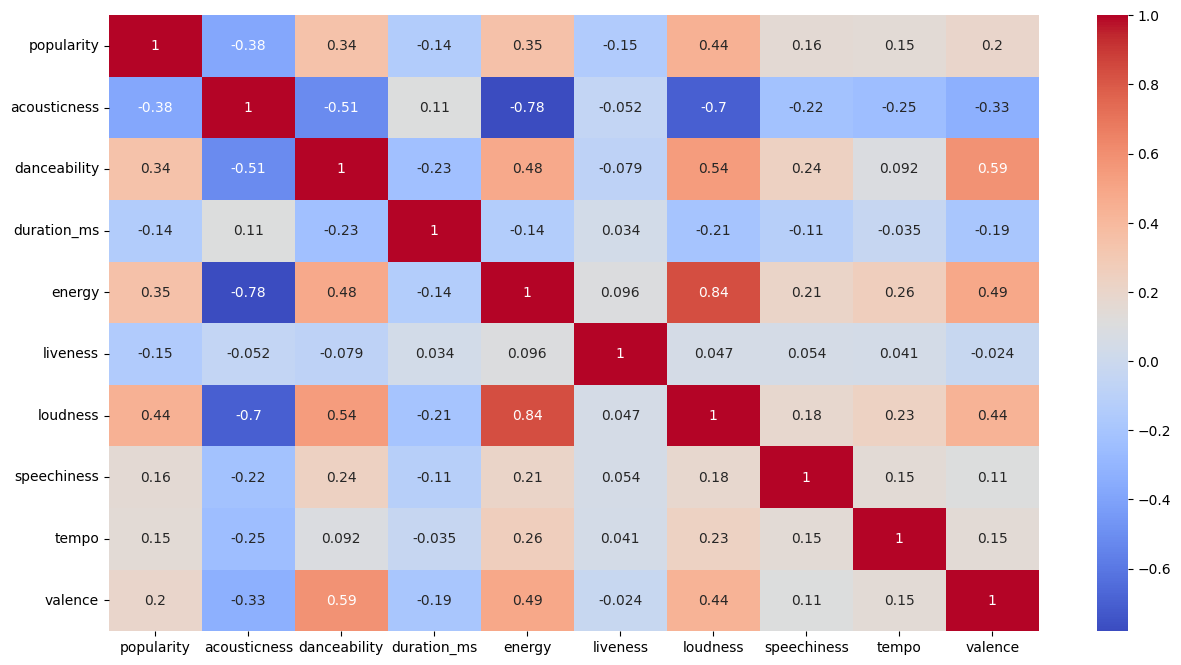

In [ ]:
#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

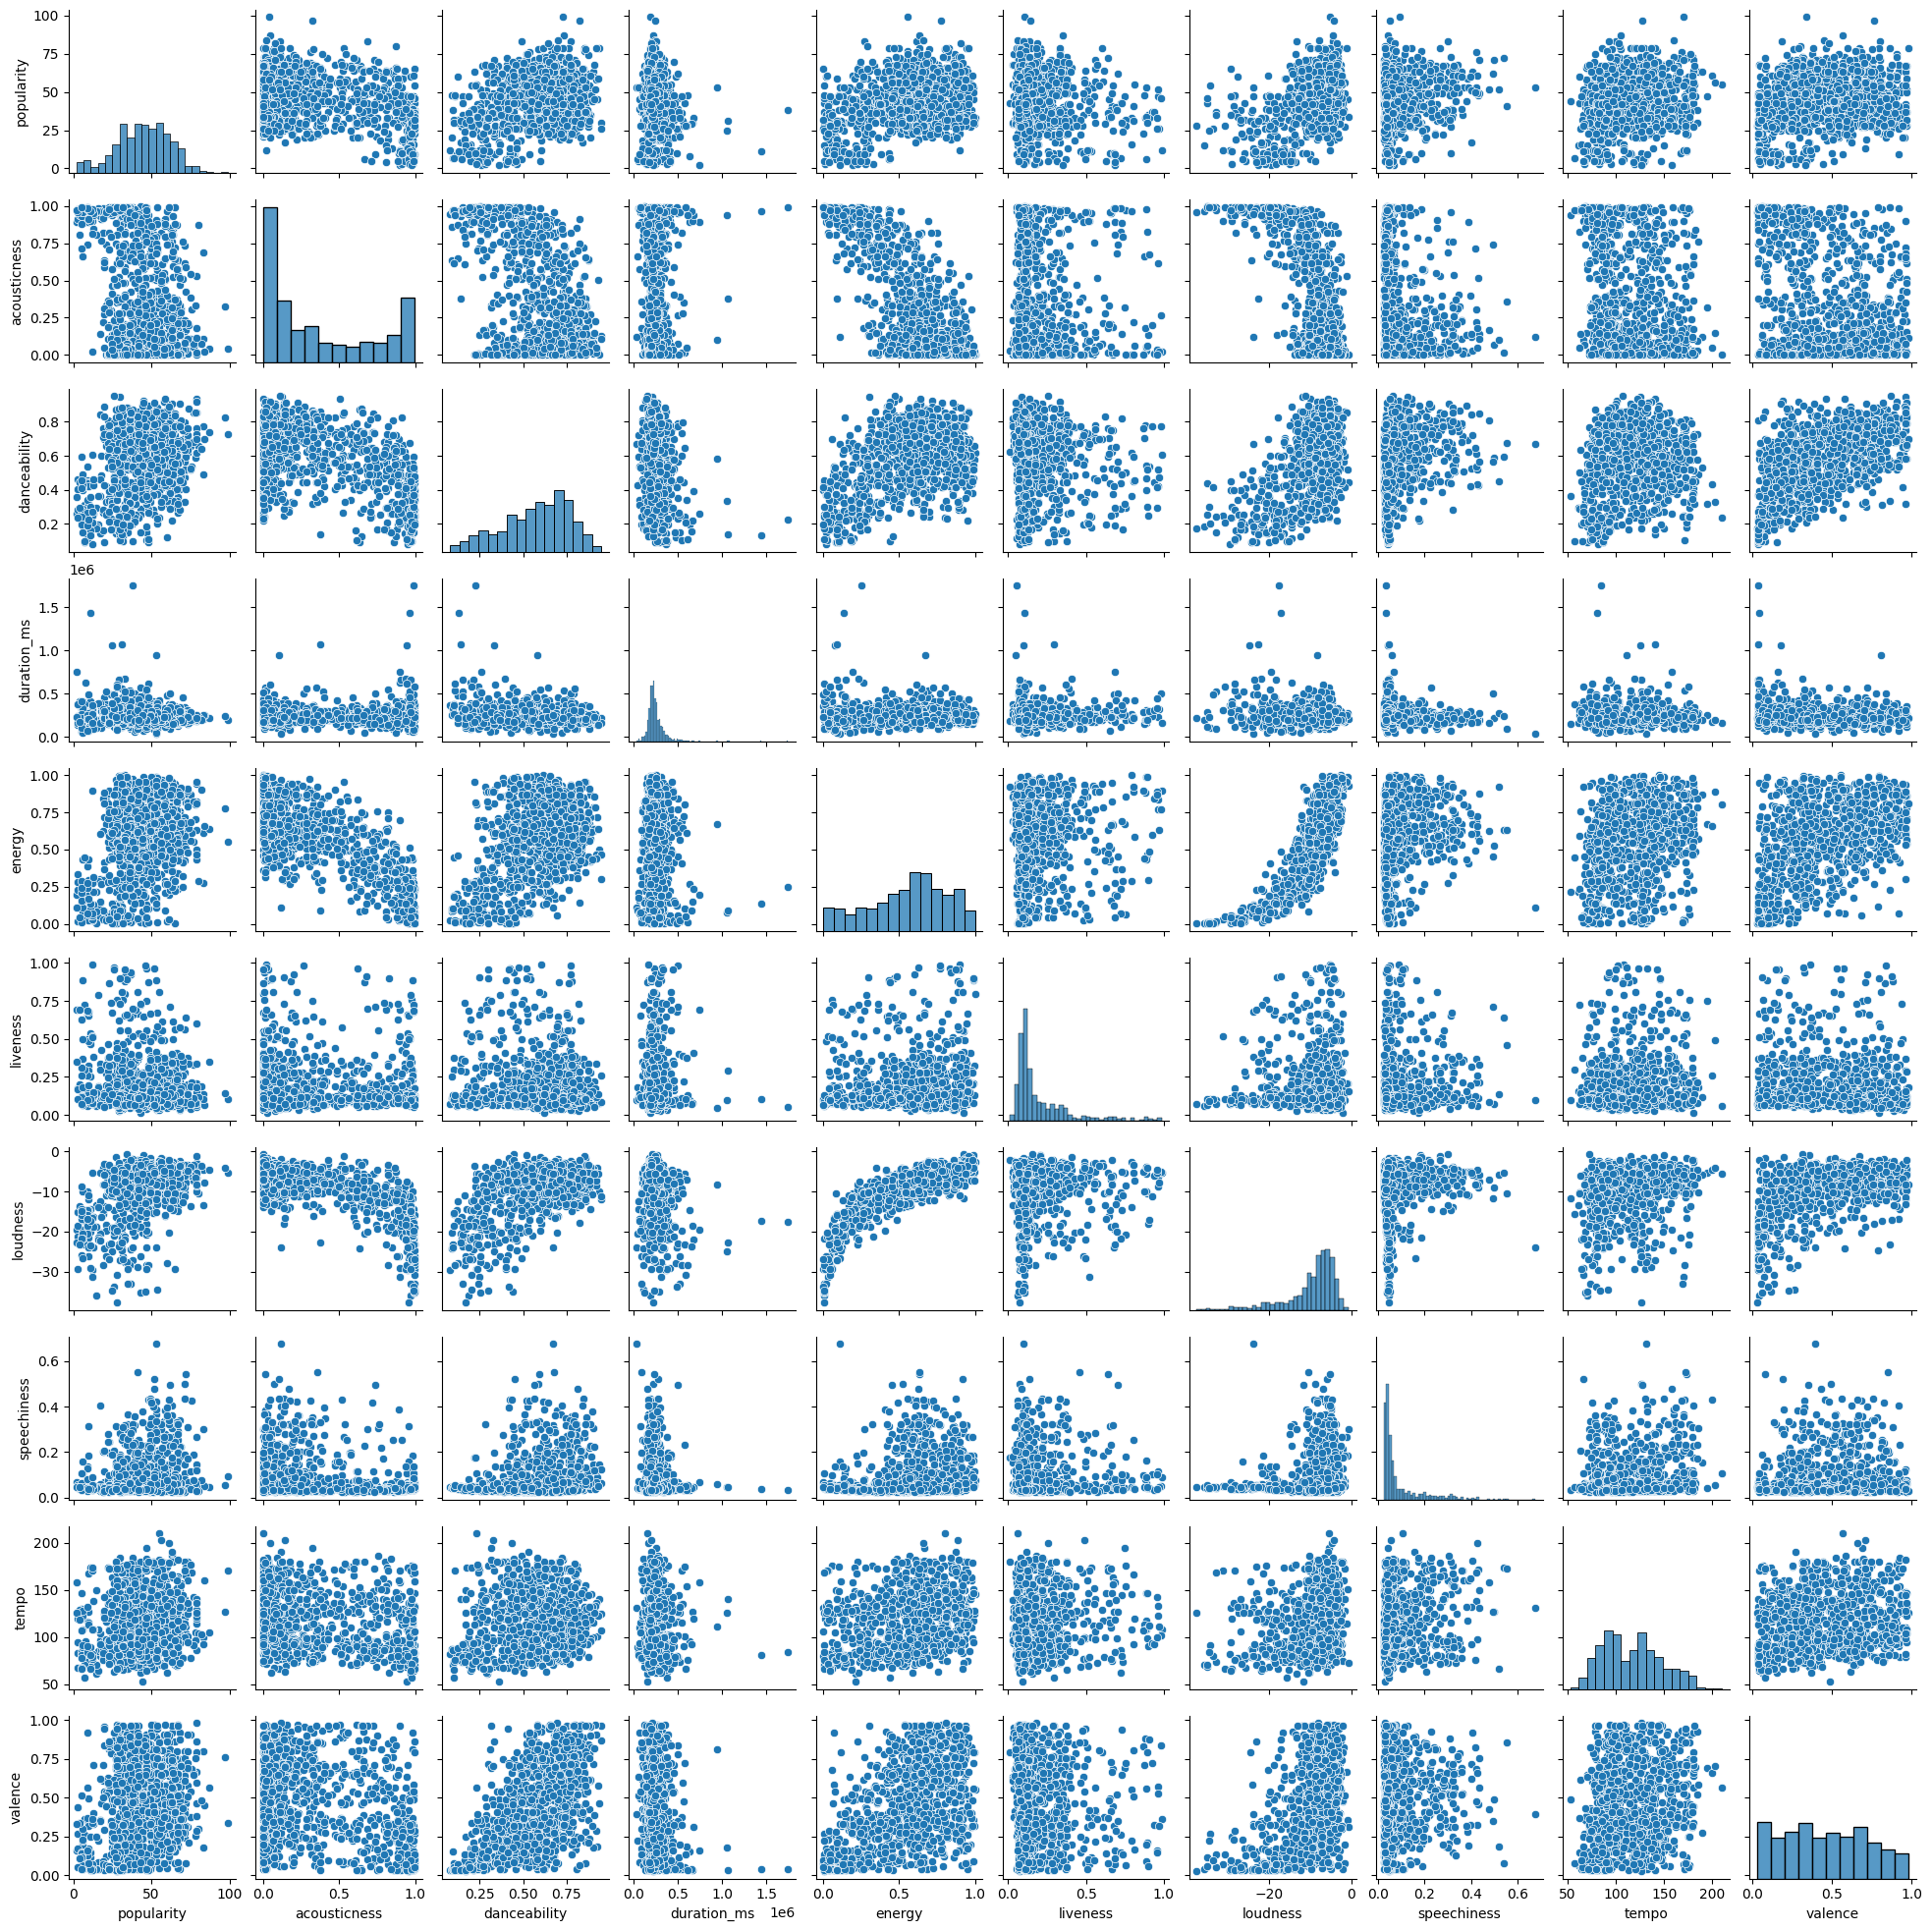

In [ ]:
#Grafico un pairplot
sns.pairplot(dataset, height=2)

## Correlacion != Causalidad

**Que dos variables tiengan un alto índice de correlación no significa que una cause a la otra.**

Las correlaciones pueden suceder por otros motivos como por ejemplo el azar.

¡Las relaciones de causalidad son dificiles de encontrar y de demostrar!

https://www.tylervigen.com/spurious-correlations

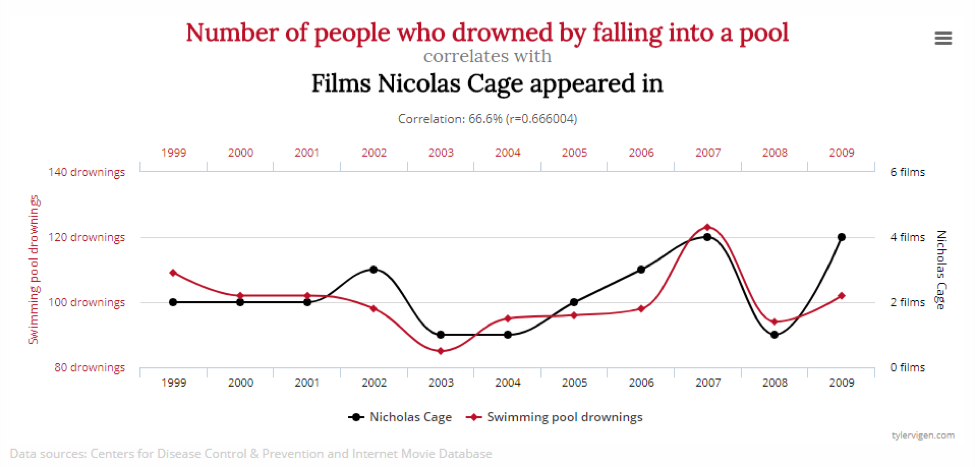

## Modelo Lineal Simple


Un **modelo de regresión lineal** es un método de aprendizaje supervisado, recordemos que en **regresión** buscamos **predecir un valor en un rango continuo**, para ciertos valores de entrada.

El modelo de regresion lineal simple es un modelo para el vínculo de dos variables, se dice simple ya que vincula **sólo una variable predictora** con la variable de respuesta.<br>

$𝑋$ = variable predictora o covariable <br>

$𝑌$ = variable dependiente o de respuesta.</center><br>

$𝑌$ $\approx$ $β_{0}$ + $β_{1}$ * $𝑋$

En resumen:

El modelo lineal simple consiste en predecir una respuesta numérica Y en base a una única variable predictora X, suponiendo una relación lineal. Vamos a estimar los parámetros $β_{0}$ y $β_{1}$



Probemos con un ejemplo creado por nosotros:

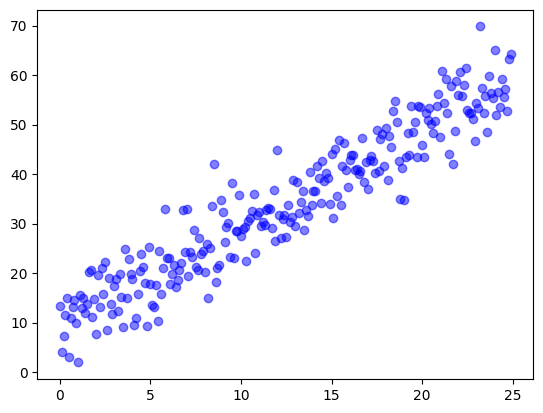

In [33]:
#Valores de X
x = np.arange(0, 25, 0.1)  # vector de numeros de 0 a 25 con intervalos de 0.1

#ruido gausiano
ruido = np.random.randn(x.shape[0])

# y= a x + b + c*ruido gausiano
B1 = 2
B0 = 10
c = 5

y = B1*x + B0 + c*ruido

#scatter plot
plt.scatter(x,y,label='data', color='blue',alpha=0.5)

In [36]:
x.shape

(250,)

In [37]:
x.reshape(-1, 1).shape

(250, 1)

In [38]:
#Creo un regresor lineal
modelo_lineal_simple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
x_ = x.reshape(-1, 1)
y_ = y.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_simple.fit(x_, y_)

#Parámetros estimados
B1_e=round(modelo_lineal_simple.coef_[0][0],2)
B0_e=round(modelo_lineal_simple.intercept_[0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : y = {B1_e} * X  + {B0_e}")

 El modelo lineal simple ajustado es : y = 1.98 * X  + 9.44


In [39]:
modelo_lineal_simple.coef_[0][0]

np.float64(1.9780089026909482)

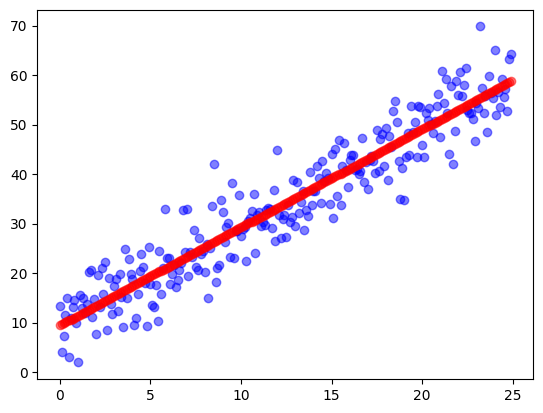

In [40]:
#Calculo los valores que estima mi modelo lineal simple

y_e = B1_e *x_ + B0_e

#Grafico las observaciones reales + las estimadas
plt.scatter(x,y,label='data', color='blue',alpha=0.5)
plt.scatter(x_,y_e,label='data', color='red',alpha=0.5)
#plt.ylim((-10000, 10000))

## Ejemplo Publicidad

Vamos a trabajar con un conjunto de datos de una empresa que contiene los ingresos (en millones) conseguidos por ventas en 200 regiones y la cantidad de presupuesto (en millones) destinado a anuncios por radio, TV y periódicos en cada una de ellas.

El departamento de ventas quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre las ventas de la empresa.

Nota: en este notebook vamos a omitir el análisis exploratorio del dataset, los invitamos a practicarlo como tarea ;)

In [42]:
publicidad = pd.read_csv('publicidad_train.csv')
publicidad.head()

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [43]:
publicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         159 non-null    float64
 1   radio      159 non-null    float64
 2   periodico  159 non-null    float64
 3   ventas     159 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [44]:
publicidad.shape

(159, 4)

Veamos las variables en un gráfico de a pares:

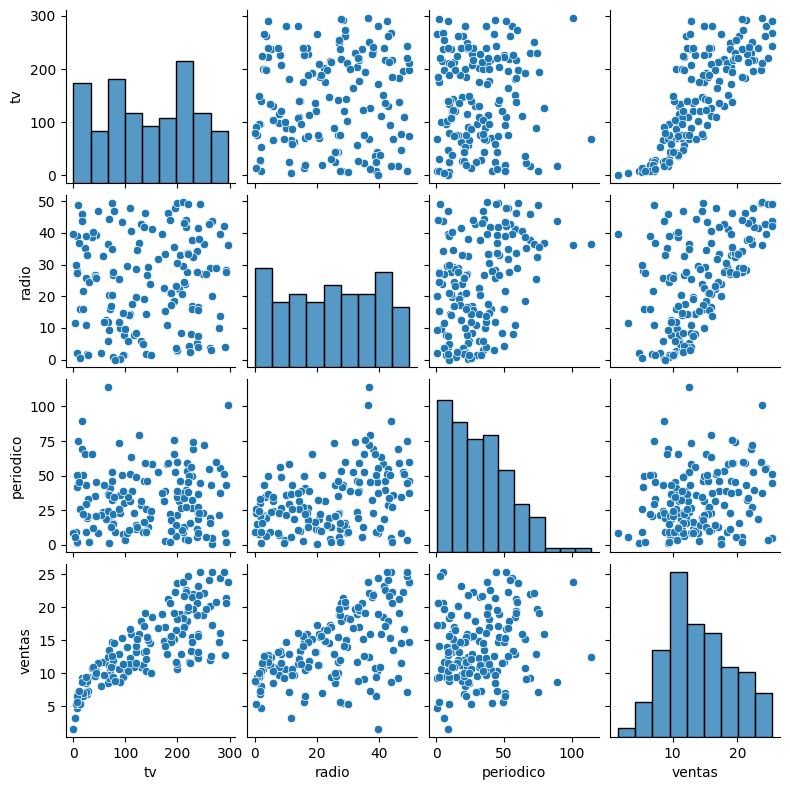

In [45]:
sns.pairplot(publicidad, height=2)

Analicemos la correlacion lineal de las variables:

<Axes: >

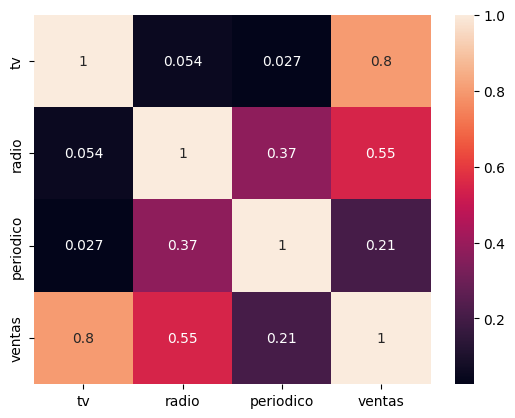

In [46]:
sns.heatmap(publicidad.corr(),annot=True)

#### Modelo TV

Proponemos el siguiente modelo par explicar las ventas de la empresa:

ventas =  $\beta_{1}$ * tv + $\beta_{0}$ + $ε$

Vamos a estimar los parámetros y modelar la siguiente relación:

$\hat{ventas}$ =  $\hat{\beta_{1}}$ * tv + $\hat{\beta_{0}}$

In [47]:
#Creo un regresor lineal
modelo_lineal_tv = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
tv=publicidad['tv'].values.reshape(-1, 1)
ventas=publicidad['ventas'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_tv.fit(tv, ventas)

#Coeficientes Estimados
B0_e = round(modelo_lineal_tv.intercept_[0],2)
B1_e = round(modelo_lineal_tv.coef_[0][0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : ventas = {B1_e} * tv  + {B0_e}")

 El modelo lineal simple ajustado es : ventas = 0.05 * tv  + 7.07


**¿Cómo se interpreta este modelo?**

$\hat{𝛽_{0}}$ es la estimación del parámetro $𝛽_{0}$ , se lo denomina intercepto y es la ordenada al origen de la recta. Para nuestro problema su valor(7.07) representa el valor promedio de ventas en millones de pesos cuando no se invierte nada en publicidad de televisión.

$\hat{𝛽_{1}}$ es la estimación del parámetro $𝛽_{1}$ , es la pendiente de la recta. Para nuestro problema su valor (0.05) indica que ante un aumento de 1 millon de pesos en la inversion de publicidad de TV,  el valor promedio de ventas aumenta 0.05 millones.

¿Cuál sería la venta esperada de la empresa si invierte 44.5 millones de pesos en publicidad de TV?

In [49]:
#Vemos que valores estima el modelo para cada observacion
ventas_estim_tv = B1_e * tv + B0_e

#Lo agregamos en el dataframe
publicidad['ventas_estim_tv']= B1_e * tv + B0_e
publicidad[["ventas", "ventas_estim_tv"]].head(10)

,ventas,ventas_estim_tv
0,22.1,18.575
1,10.4,9.295
2,9.3,7.930
3,18.5,14.645
4,12.9,16.110
5,7.2,7.505
6,11.8,9.945
7,13.2,13.080
8,4.8,7.500
9,10.6,17.060


In [50]:
#Vemos que valores estima el modelo para cada observacion
ventas_estim_tv = modelo_lineal_tv.predict(tv)

#Lo agregamos en el dataframe
publicidad['ventas_estim_tv']= ventas_estim_tv
publicidad.head(3)

,tv,radio,periodico,ventas,ventas_estim_tv
0,230.1,37.8,69.2,22.1,18.332214
1,44.5,39.3,45.1,10.4,9.250860
2,17.2,45.9,69.3,9.3,7.915079


Veamos en forma gráfica el ajuste que realiza el modelo propuesto

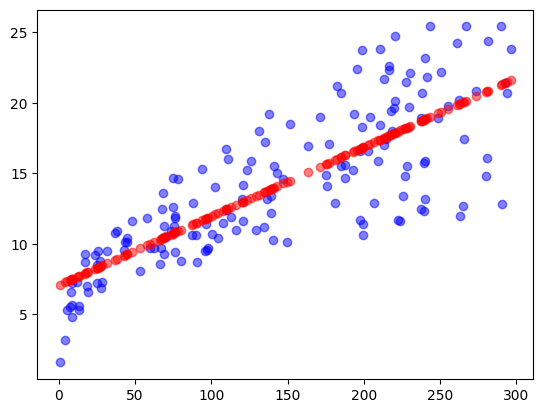

In [51]:
#Grafico las observaciones reales + las estimadas
plt.scatter(publicidad['tv'],publicidad['ventas'],color='blue',alpha=0.5)
plt.scatter(publicidad['tv'],publicidad['ventas_estim_tv'], color='red',alpha=0.5)

#### Modelo Radio

Proponemos el siguiente modelo par explicar las ventas de la empresa:

ventas =  $\beta_{1}$ * radio + $\beta_{0}$ + $ε$

Vamos a estimar los parámetros y modelar la siguiente relación:

$\hat{ventas}$ =  $\hat{\beta_{1}}$ * radio + $\hat{\beta_{0}}$

In [52]:
#Creo un regresor lineal
modelo_lineal_radio = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
radio=publicidad['radio'].values.reshape(-1, 1)
ventas=publicidad['ventas'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_radio.fit(radio,ventas)

#Coeficientes Estimados
B0_e=round(modelo_lineal_radio.intercept_[0],2)
B1_e=round(modelo_lineal_radio.coef_[0][0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : ventas = {B1_e} * radio  + {B0_e}")

 El modelo lineal simple ajustado es : ventas = 0.19 * radio  + 9.32


**¿Cómo se interpreta este modelo?**

$\hat{𝛽_{0}}$ es la estimación del parámetro $𝛽_{0}$ , se lo denomina intercepto y es la ordenada al origen de la recta. Para nuestro problema su valor(9.32) representa el valor promedio de ventas en millones de pesos cuando no se invierte nada en publicidad de radio.

$\hat{𝛽_{1}}$ es la estimación del parámetro $𝛽_{1}$ , es la pendiente de la recta. Para nuestro problema su valor (0.19) indica que ante un aumento de 1 millon de pesos en la inversion de publicidad de radio,  el valor promedio de ventas aumenta 0.19 millones.

¿Cuál sería la venta esperada de la empresa si invierte 37.8 millones de pesos en publicidad de radio?

In [53]:
#Vemos que valores estima el modelo para cada observacion
ventas_estim_radio = B1_e * radio +  B0_e

#Lo agregamos al dataframe
publicidad['ventas_estim_radio']=ventas_estim_radio
publicidad.head(3)

,tv,radio,periodico,ventas,ventas_estim_tv,ventas_estim_radio
0,230.1,37.8,69.2,22.1,18.332214,16.502
1,44.5,39.3,45.1,10.4,9.250860,16.787
2,17.2,45.9,69.3,9.3,7.915079,18.041


In [54]:
#Vemos que valores estima el modelo para cada observacion
ventas_estim_radio=modelo_lineal_radio.predict(radio)

#Lo agregamos al dataframe
publicidad['ventas_estim_radio']=ventas_estim_radio
publicidad.head(3)

,tv,radio,periodico,ventas,ventas_estim_tv,ventas_estim_radio
0,230.1,37.8,69.2,22.1,18.332214,16.669946
1,44.5,39.3,45.1,10.4,9.250860,16.961699
2,17.2,45.9,69.3,9.3,7.915079,18.245410


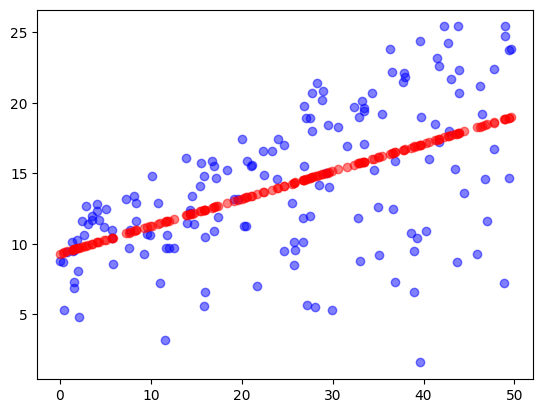

In [55]:
#Grafico las observaciones reales + las estimadas
plt.scatter(publicidad['radio'],publicidad['ventas'],color='blue',alpha=0.5)
plt.scatter(publicidad['radio'],publicidad['ventas_estim_radio'], color='red',alpha=0.5)

¿Qué modelo elegimos? ¿Cuál explica mejor las ventas esperadas de la empresa?

## Métricas

### Coeficiente de determinación $R^{2}$




Es la proporción de variabilidad explicada por el modelo, se lo determina coeficiente de determinación.

No depende de las unidades de medida y **su valor está entre 0 y 1** .

Cuando $R^2$ = 0 el modelo se ajusta poco a la varibilidad de los datos. Por el contrario $R^2$ = 1 se ajusta mucho a la variabilidad de los datos.

Mientras mayor es $R^2$, mayor es la fuerza de la/s variable/s regresora/s para predecir la variable respuesta. Mayor es la capacidad del modelo de explicar el fenómeno.

Variabilidad no explicada por el modelo

RSS = $\sum_{i=1}^n = $( $y^i - \hat{y^i})^2$

Variabilidad total de los datos (Total Sum of Squares)

TSS = $\sum_{i=1}^n = $( $y^i - \overline{Y})^2$

Proporcion de variabilidad explicada por el modelo

$R^2$ = $\frac{TSS - RSS}{TSS}$

In [56]:
#Metricas de los modelos
r2_tv = metrics.r2_score(ventas, ventas_estim_tv)
r2_radio = metrics.r2_score(ventas, ventas_estim_radio)

print(f"El R2 del modelo TV es: {r2_tv}")
print(f"El R2 del modelo Radio es: {r2_radio}")

El R2 del modelo TV es: 0.6430060412374443
El R2 del modelo Radio es: 0.2982107298286151


In [57]:
#Otra forma de obtener el R2
r2_tv = modelo_lineal_tv.score(tv,ventas)
r2_radio= modelo_lineal_radio.score(radio,ventas)

print(f"El R2 del modelo TV es: {r2_tv}")
print(f"El R2 del modelo Radio es: {r2_radio}")

El R2 del modelo TV es: 0.6430060412374443
El R2 del modelo Radio es: 0.2982107298286151


**¿Cómo se interpretan estos valores?**

* El modelo tv logra explicar un 64.30% de la variablidad del problema.
* El modelo radio logra explicar un 29.82% de la variablidad del problema.

### MSE y RMSE

**Error Cuadrático Medio (Mean Squared Error)**

Medida de qué tan cercana es la recta de regresión a los puntos que representan los datos. Mientras más chico más cerca está nuestro modelo de los datos reales. Al ser un valor elevado al cuadrado, es sensible a valores de diferencias grandes.

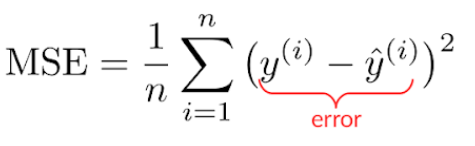



Por ejemplo:

Los valores **estimados**  por el modelo son: [ 3,  2,  8  , 1.5 ]

Los valores **reales** son:       [ 4,  2.3,  10 , 2 ]

Calculo MSE: ( (4-3)^2 + (2.3-2)^2 + (10-8)^2 + (2-1.5)^2  )  /  4


**Raíz del Error Cuadrático Medio (Root Mean Squared Error)**

Tiene las mismas unidades que los valores representados en el eje vertical. Es la distancia de un punto hasta la recta de regresión, medida en línea recta. Mide el desvío estándar (cuánto se alejan los valores de la media).


In [61]:
print("MSE: " + str(metrics.mean_squared_error(ventas, ventas_estim_tv )))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(ventas, ventas_estim_tv))))

MSE: 9.758334757584304
RMSE: 3.123833343439484


In [ ]:
print("MSE: " + str(metrics.mean_squared_error(ventas, ventas_estim_radio, squared=True)))
print("RMSE: " + str(metrics.mean_squared_error(ventas, ventas_estim_radio, squared=False)))

MSE: 19.18322273954248
RMSE: 4.379865607475015


¿Cómo se interpretan estos valores?

* El modelo TV tiene menor error cuadrático medio que el modelo radio.
* El modelo TV tiene un RMSE de 3.12, es decir un error de 3.12 millones al hacer una predicción.
* El modelo Radio tiene un RMSE de 4.38, es decir un error de 4.38 millones al hacer una predicción

## Selección del Modelo

Para poder comparar los modelos y seleccionar aquél que mejor logra explicar las ventas de la empresa se evalua el $R^{2}$ (coeficiente de determinación), que representa la capacidad de predicción del modelo.

En nuestro caso, el modelo TV tiene mayor $R^{2}$ y sería el modelo lineal simple que seleccionaríamos para explicar las ventas esperadas de la empresa.


## Predicción y evaluación en datos de testeo

Para evaluar cómo se comporta el modelo ante nuevas observaciones, vamos a realizar predicciones sobre casos que no se utilizraon para entrenar.  Es decir, vamos a predecir el precio de venta esperado a partir de observaciones que el modelo nunca vio, este es nuestro conjunto de test.

Para evaluar la performance de nuestros modelos se evalúan las métricas MSE o RMSE luego de realizar las predicciones.

In [62]:
publicidad_test=pd.read_csv('publicidad_test.csv')
publicidad_test.head()

,tv,radio,periodico,ventas
0,131.7,18.4,34.6,12.9
1,172.5,18.1,30.7,14.4
2,85.7,35.8,49.3,13.3
3,188.4,18.1,25.6,14.9
4,163.5,36.8,7.4,18.0


In [63]:
#Casos nuevos

tv_test=publicidad_test['tv'].values.reshape(-1,1)
radio_test=publicidad_test['radio'].values.reshape(-1,1)

#Variable a predecir
ventas_test=publicidad_test['ventas'].values.reshape(-1,1)

#Prediccion sobre casos nuevos con mis modelos ya entrenados
ventas_predict_tv     =  modelo_lineal_tv.predict(tv_test)
ventas_predict_radio  =  modelo_lineal_radio.predict(radio_test)

In [66]:
#Error modelo TV
print('Modelo TV:')

mse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_tv,
 #       squared = True
       )

print(f"El error (mse) de test es: {mse}")


rmse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_tv,
#        squared = False
       )

print(f"El error (rmse) de test es: {np.sqrt(rmse)}")

Modelo TV:
El error (mse) de test es: 13.801927526657625
El error (rmse) de test es: 3.715094551509776


In [68]:
#Error modelo radio
print('Modelo Radio:')

mse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_radio,
#        squared = True
       )

print(f"El error (mse) de test es: {mse}")


rmse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_radio,
#        squared = False
       )

print(f"El error (rmse) de test es: {np.sqrt(rmse)}")

Modelo Radio:
El error (mse) de test es: 14.088246717472016
El error (rmse) de test es: 3.7534313257967056


**¿Cómo se interpetan estos valores?**

## Modelo Lineal Múltiple

En un modelo lineal múltiple tenemos más de una variable predictora:

$𝑌$ $\approx$ $β_{0}$ + $β_{1}$ * $𝑋_{1}$ + $β_{2}$ * $𝑋_{2}$ + ...+ $β_{n}$ * $𝑋_{n}$

Proponemos el siguiente modelo lineal multiple para explicar las ventas de la empresa:

ventas =  $\beta_{1}$ * tv + $\beta_{2}$ * radio + $\beta_{0}$ + $ε$


Vamos a estimar los parámetros y modelar la siguiente relación:


$\hat{ventas}$ =  $\hat{\beta_{1}}$ * tv + $\hat{\beta_{2}}$ * radio + $\hat{\beta_{0}}$

### Ajuste del Modelo

In [ ]:
#Creo un regresor lineal
modelo_lineal_multiple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
medios=publicidad[['tv','radio']]
ventas=publicidad['ventas'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_multiple.fit(medios,ventas)

#Coeficientes estimados
B1_e=round(modelo_lineal_multiple.coef_[0][0],2)
B2_e=round(modelo_lineal_multiple.coef_[0][1],2)
B0_e=round(modelo_lineal_multiple.intercept_[0],2)

#Muestro el modelo
print(f" El modelo lineal multiple ajustado es : ventas = {B1_e} * tv  + {B2_e} * radio + {B0_e}")

 El modelo lineal multiple ajustado es : ventas = 0.05 * tv  + 0.18 * radio + 2.93


**¿Cómo interpretamos este modelo?**

* $\hat{\beta_{0}}$: 2.93 millones de pesos son las ventas promedio de la empresa sin invertir en publicidad en radio ni en television

* $\hat{\beta_{1}}$: por cada 1 millon de pesos que invierta en publicidad de television las ventas promedio de la empresa aumentan 0.05 millones (manteniendo constante la inversion en radio)

* $\hat{\beta_{2}}$: por cada 1 millon de pesos que invierta en publicidad de radio las ventas promedio de la empresa aumentan 0.18 millones (manteniendo constante la inversion en television)

### Evaluación de las métricas del modelo ajustado

In [ ]:
#R2
r2=modelo_lineal_multiple.score(medios,ventas)
print(f"El R2 del modelo multiple es: {r2}")

El R2 del modelo multiple es: 0.8961518653041024


In [ ]:
#R2 Ajustado
n=publicidad.shape[0] #numero de observaciones
p=2                   #numero de variables independientes

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.8948204789618474

In [ ]:
#RMSE

ventas_pred=modelo_lineal_multiple.predict(publicidad[['tv','radio']])

rmse = metrics.mean_squared_error(
        y_true  = ventas,
        y_pred  = ventas_pred,
        squared = False
       )
print(f"El error (rmse) del modelo multiple es: {rmse}")

El error (rmse) del modelo multiple es: 1.684832661182593


### Prediccion y Evaluación en datos de testeo

In [ ]:
#Casos nuevos
medios_test=publicidad_test[['tv','radio']]

#Variable a predecir
ventas_test=publicidad_test['ventas'].values.reshape(-1,1)

#Prediccion sobre casos nuevos con mis modelos ya entrenados
ventas_predict_medios    =  modelo_lineal_multiple.predict(medios_test)

In [ ]:
#Error modelo TV
print('Modelo Múltiple:')

mse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_medios,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")


rmse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_medios,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Modelo Múltiple:
El error (mse) de test es: 2.728030474263713
El error (rmse) de test es: 1.6516750510508151
